In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#create path for importing data
path = r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Python\Instacart Basket Analysis 01-2025'

In [5]:
#importing data as dataframe
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'cust_ords_prods.pkl'))

In [9]:
df.shape

(32404859, 32)

In [10]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,median_days_since_order,customer_frequency,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


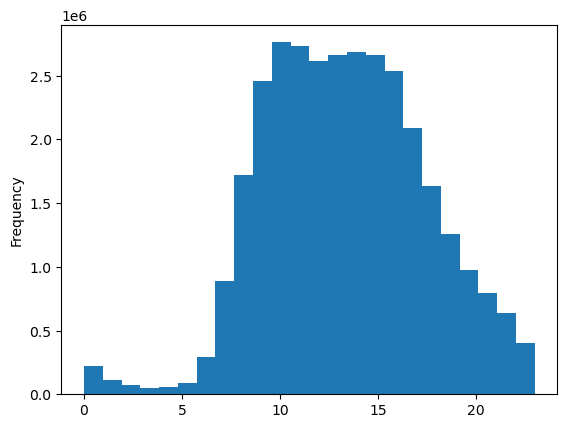

In [18]:
#creating a histogram  from the hour of day column
hist_hod = df['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
#Analysis - 8am is the busiest hour, and they remain their busiest until 3/4pm

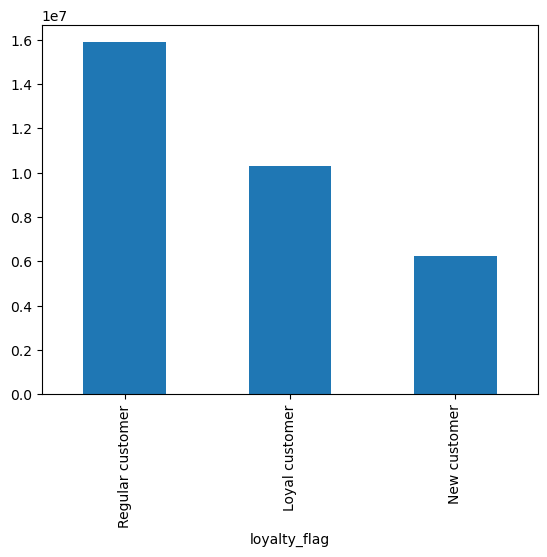

In [26]:
#creating bar chart, using sort index to sort the days of week and color argument to change colors of bars (input colors in bar order)
bar_loyal = df['loyalty_flag'].value_counts().plot.bar()

In [30]:
#creating a random sample from out df
np.random.seed(21)
dev = np.random.rand(len(df)) <= 0.7

In [32]:
big = df[dev]
small = df[~dev]

In [34]:
#creating simple dataframe from sample
df_price_hod = small[['order_hour_of_day','prices']]

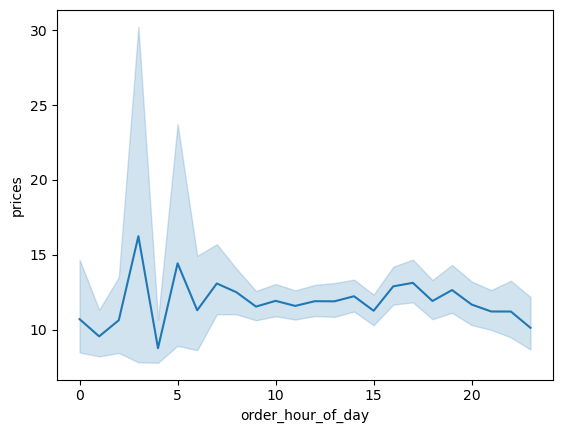

In [38]:
#creating line chart
line_price_hod = sns.lineplot(data = df_price_hod, x = 'order_hour_of_day',y = 'prices')

In [40]:
#creating simple dataframe from sample
df_age_depend = small[['Age','Number of Dependants']]

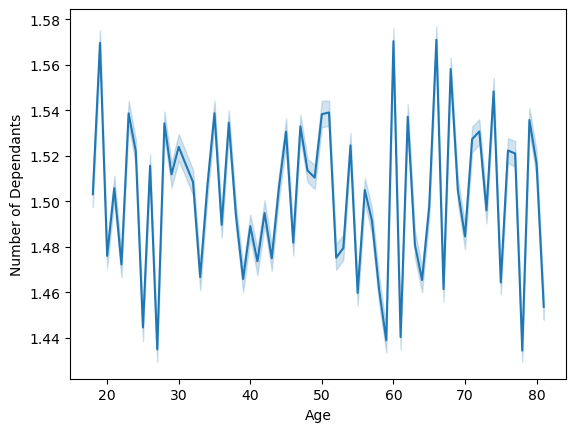

In [44]:
#creating line chart
line_age_depend = sns.lineplot(data = df_age_depend, x = 'Age',y = 'Number of Dependants')

In [ ]:
#There does not appear to be any correlation/connection between between age and number of dependants

In [46]:
#creating simple dataframe from sample
df_age_income = small[['Age','Income']]

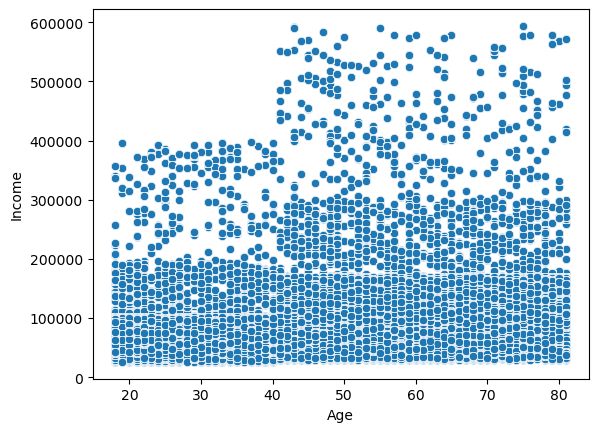

In [48]:
#creating scatterplot 
sp_age_income = sns.scatterplot(x = 'Age', y = 'Income',data = df_age_income)

In [ ]:
#There does seem to be an increase in income as customers get older, customers 40+ are making more than 400.000 whereas customers under 40 don't.  
#Additionally significantly more customers 40+ make 200.000-300.000 when compared to customers under 40  

In [52]:
#exporting my charts
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hod.png'))
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal.png'))
line_price_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hod.png'))
line_age_depend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_depend.png'))
sp_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sp_age_income.png'))